In [33]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

In [34]:
# Load the dataset
data = pd.read_csv("D:\ML Financial Fraud Detection\data\creditcard.csv")
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Time,Amount,Class
0,-0.877983,-0.826880,-0.226479,0.367366,0.913585,-0.803179,1.492689,-0.271124,-0.021367,-0.747212,...,-1.356582,0.466430,-0.035641,-1.615132,1.164739,-0.734592,-0.810252,64717.536216,925.664644,1
1,0.200569,1.148637,-1.015822,0.061680,0.428817,0.693106,0.176442,-0.367028,-0.827590,0.086144,...,1.374876,-0.645964,-0.799192,-0.482744,-0.953329,0.122670,1.624678,164275.826433,2709.504737,0
2,0.323079,-0.252354,-0.291811,-1.563191,0.883110,-0.077837,-0.180480,3.193108,0.298753,-0.751791,...,0.852774,0.484733,-0.846357,-0.643550,1.029961,-0.334775,-0.403648,126482.697193,4364.729179,0
3,-0.955123,0.423599,2.062525,-1.067533,0.024219,1.412221,-0.079641,0.452372,-1.062394,0.428307,...,1.317598,-1.006543,1.139879,1.317115,-0.118069,-2.121855,-0.607822,103443.396801,3661.124432,1
4,1.296995,-0.022868,-0.999302,-0.504775,0.840620,0.546734,-0.238932,-0.366824,-0.391758,-0.922410,...,1.187679,-0.464617,0.201160,0.283288,-0.258905,0.586694,-0.474904,26958.772919,4032.805739,0


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      1000 non-null   float64
 1   V2      1000 non-null   float64
 2   V3      1000 non-null   float64
 3   V4      1000 non-null   float64
 4   V5      1000 non-null   float64
 5   V6      1000 non-null   float64
 6   V7      1000 non-null   float64
 7   V8      1000 non-null   float64
 8   V9      1000 non-null   float64
 9   V10     1000 non-null   float64
 10  V11     1000 non-null   float64
 11  V12     1000 non-null   float64
 12  V13     1000 non-null   float64
 13  V14     1000 non-null   float64
 14  V15     1000 non-null   float64
 15  V16     1000 non-null   float64
 16  V17     1000 non-null   float64
 17  V18     1000 non-null   float64
 18  V19     1000 non-null   float64
 19  V20     1000 non-null   float64
 20  V21     1000 non-null   float64
 21  V22     1000 non-null   float64
 22  V

In [36]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Time,Amount,Class
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.026152,0.020801,0.000078,0.020445,0.015102,-0.019345,-0.037953,0.004213,-0.009221,-0.055853,...,0.016011,0.004448,-0.015203,0.027521,0.012494,-0.064429,-0.042350,84712.410361,2535.086526,0.10000
std,1.007585,0.947672,0.999347,1.003109,0.991151,0.961570,1.018084,0.993925,1.022323,0.978723,...,0.991380,1.007092,0.976485,0.998576,0.975368,0.982414,0.989410,50478.999046,1460.949467,0.30015
min,-2.973306,-2.908661,-3.635200,-3.033989,-3.138515,-3.199265,-3.856375,-3.176704,-3.094289,-3.329504,...,-3.601085,-3.453354,-2.991136,-3.375579,-2.976032,-3.655087,-3.232565,800.376519,16.091318,0.00000
25%,-0.675276,-0.618412,-0.692433,-0.677263,-0.641090,-0.697085,-0.712004,-0.638674,-0.704888,-0.708870,...,-0.678151,-0.700215,-0.706417,-0.629936,-0.631506,-0.688755,-0.749760,40774.292853,1205.371356,0.00000
50%,0.040721,-0.004540,0.000445,0.002060,0.014223,0.010897,-0.088682,0.026003,0.019449,-0.048854,...,0.034080,-0.021816,0.017471,0.045809,0.015365,-0.059739,-0.050339,85844.340208,2593.669532,0.00000
75%,0.712262,0.698934,0.676227,0.697432,0.688219,0.613047,0.650455,0.660222,0.671864,0.557262,...,0.711228,0.694387,0.576593,0.720748,0.621150,0.585096,0.680160,128612.470245,3802.325287,0.00000
max,3.287761,3.112910,2.949094,2.890643,3.377383,2.992811,3.157771,3.193108,3.691625,2.969510,...,2.998734,3.158942,3.942331,2.721912,3.428910,2.679629,3.926238,172743.216202,4997.068629,1.00000


In [37]:
# Check for missing values
print("Missing values:\n", data.isnull().sum())

Missing values:
 V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Time      0
Amount    0
Class     0
dtype: int64


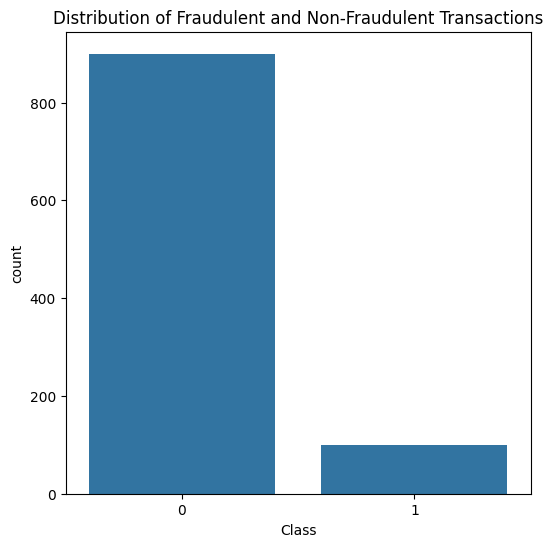

In [38]:
# Distribution of target variable (fraud and non-fraud)
plt.figure(figsize=(6, 6))
sns.countplot(x='Class', data=data)
plt.title('Distribution of Fraudulent and Non-Fraudulent Transactions')
plt.show()

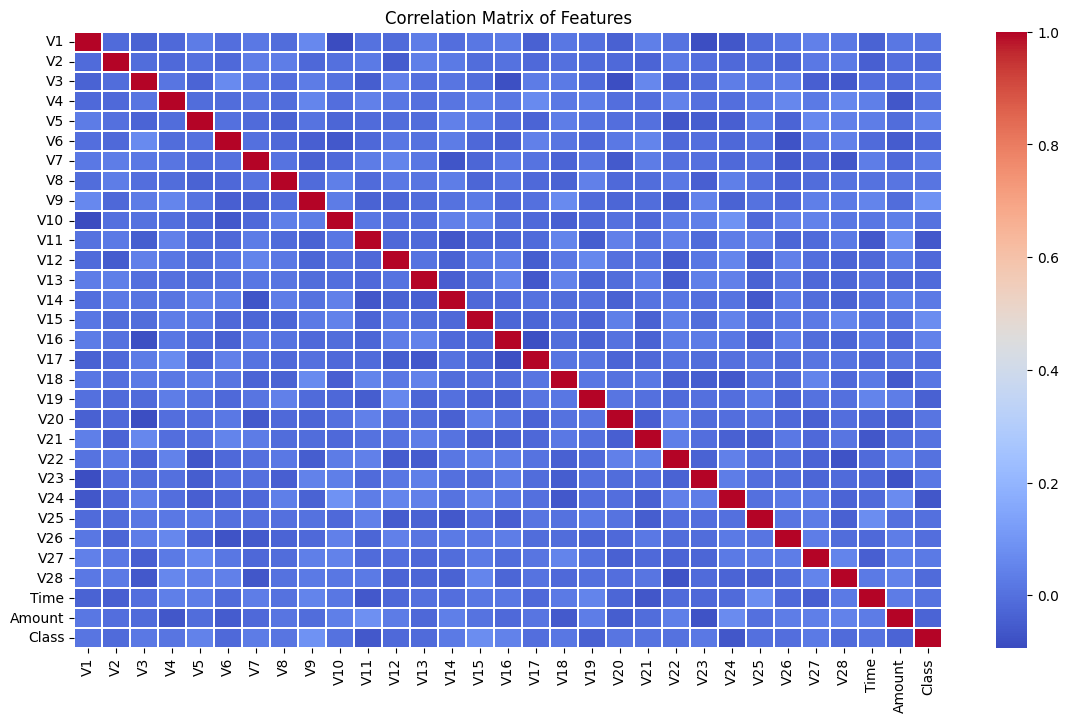

In [39]:
# 1. Correlation Heatmap (with focus on fraud detection)
plt.figure(figsize=(14, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.2)
plt.title('Correlation Matrix of Features')
plt.show()

In [40]:
# Zooming in on correlations with the target (Class)
corr_with_class = corr_matrix['Class'].sort_values(ascending=False)
print("Correlations with the target:\n", corr_with_class)

Correlations with the target:
 Class     1.000000
V9        0.086792
V15       0.075591
V5        0.046529
V16       0.044927
V7        0.028014
V27       0.024773
V14       0.023925
V23       0.021583
V3        0.018728
V18       0.015537
V4        0.012311
V20       0.011912
V1        0.010902
V8        0.010705
V21       0.008918
Time      0.008512
V22       0.003629
V10       0.001991
V25       0.000289
V17      -0.004433
V26      -0.004743
V28      -0.012157
V13      -0.012571
V2       -0.014473
V12      -0.017024
V6       -0.020612
Amount   -0.031556
V19      -0.040972
V11      -0.062723
V24      -0.065218
Name: Class, dtype: float64


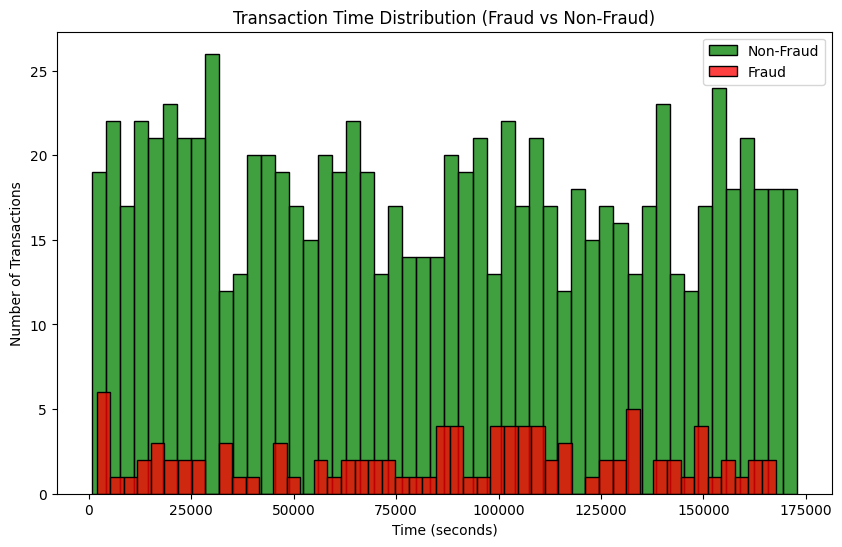

In [41]:
# 2. Time-Based Analysis (does fraud tend to occur at specific times?)
plt.figure(figsize=(10, 6))
sns.histplot(data[data['Class'] == 0]['Time'], bins=50, color='green', label='Non-Fraud')
sns.histplot(data[data['Class'] == 1]['Time'], bins=50, color='red', label='Fraud')
plt.title('Transaction Time Distribution (Fraud vs Non-Fraud)')
plt.xlabel('Time (seconds)')
plt.ylabel('Number of Transactions')
plt.legend()
plt.show()

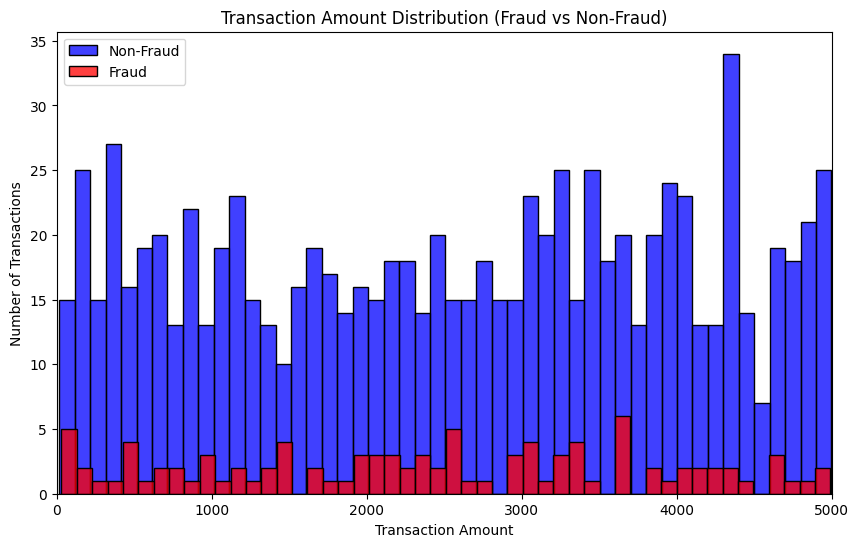

In [42]:
# 3. Amount Distribution (Comparing fraud vs non-fraud)
plt.figure(figsize=(10, 6))
sns.histplot(data[data['Class'] == 0]['Amount'], bins=50, color='blue', label='Non-Fraud')
sns.histplot(data[data['Class'] == 1]['Amount'], bins=50, color='red', label='Fraud')
plt.title('Transaction Amount Distribution (Fraud vs Non-Fraud)')
plt.xlabel('Transaction Amount')
plt.ylabel('Number of Transactions')
plt.legend()
plt.xlim([0, 5000])  # Limiting the x-axis for clearer visualization
plt.show()

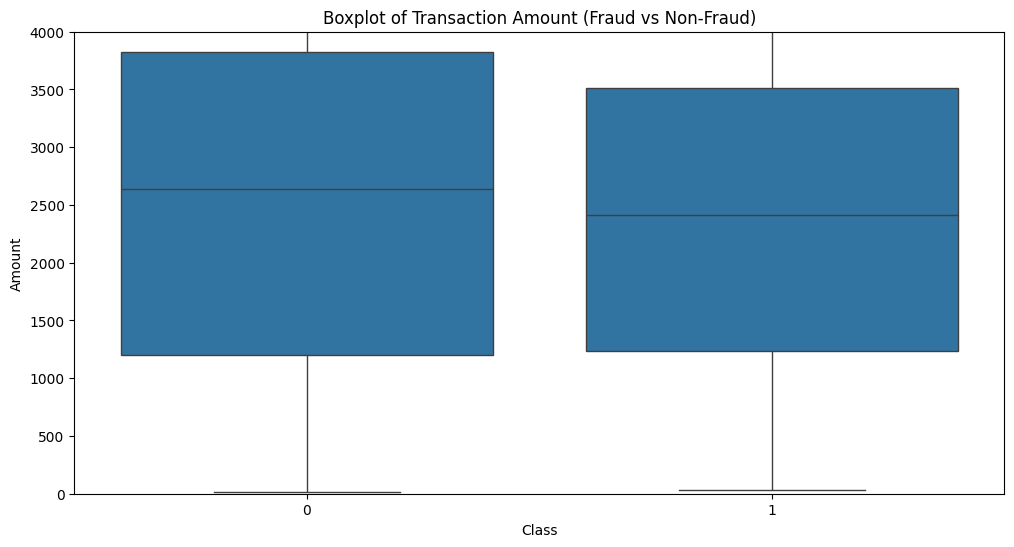

In [43]:
# 4. Outlier Detection using Boxplot for Amount
plt.figure(figsize=(12, 6))
sns.boxplot(x='Class', y='Amount', data=data)
plt.title('Boxplot of Transaction Amount (Fraud vs Non-Fraud)')
plt.ylim([0, 4000])  # Focus on most relevant amounts
plt.show()

In [44]:
# 5. Dimensionality Reduction with PCA (to visualize data distribution)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop(columns=['Class']))

In [45]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

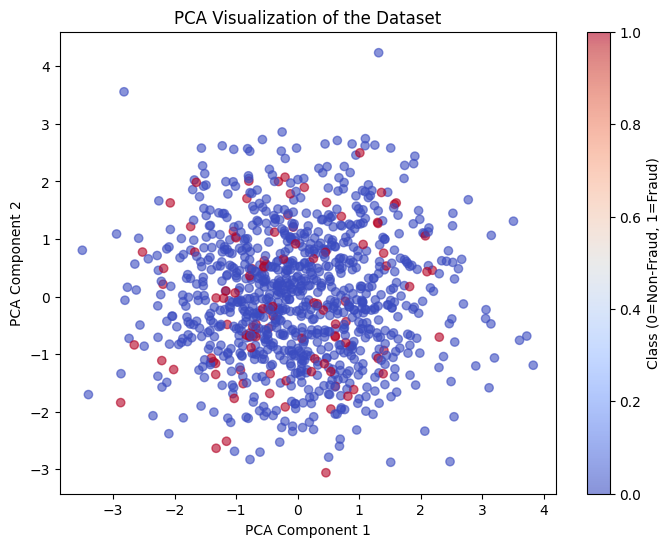

In [46]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['Class'], cmap='coolwarm', alpha=0.6)
plt.title('PCA Visualization of the Dataset')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Class (0=Non-Fraud, 1=Fraud)')
plt.show()

In [47]:
# 6. Feature Importance using RandomForest
from sklearn.ensemble import RandomForestClassifier

In [48]:
X = data.drop(columns=['Class'])
y = data['Class']

In [49]:
# Train a basic RandomForest to get feature importances
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

RandomForestClassifier(random_state=42)

In [50]:
# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)


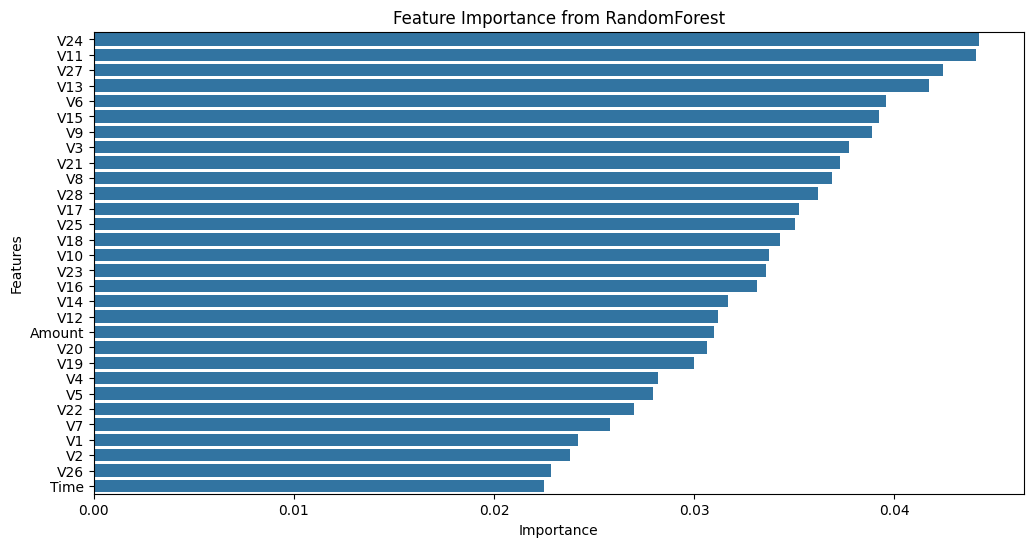

In [51]:
# Plot Feature Importance
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importance from RandomForest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [52]:
# Optional: Top 5 features based on importance
top_5_features = feature_importances.index[:5]
print("Top 5 important features: ", top_5_features)

Top 5 important features:  Index(['V24', 'V11', 'V27', 'V13', 'V6'], dtype='object')


In [53]:

print(data['Class'].value_counts())

Class
0    900
1    100
Name: count, dtype: int64
